In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


ride_data_df = pd.merge(ride_data, city_data, on = "city", how = "left" )
ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot    

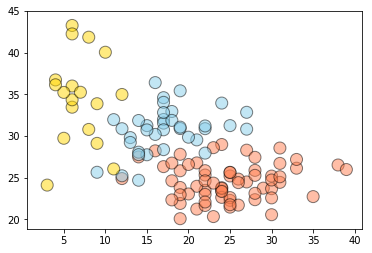

In [8]:
# Obtain the x and y coordinates for each of the three city types
city = ride_data_df[['city', 'type']].drop_duplicates('city').set_index('city')['type']
avg_fare = ride_data_df.groupby('city').mean()['fare']
total_rides = ride_data_df.groupby('city').count()['ride_id']
total_driver = ride_data_df['driver_count'].mean()
total_data = pd.DataFrame({'Average Fare': avg_fare,'Total Number of Rides': total_rides,'Total Number of Drivers': total_driver,'Type of City': city})

# Build the scatter plots for each city types
suburban_type = total_data.loc[total_data['Type of City']=='Suburban']
urban_type = total_data.loc[total_data['Type of City']=='Urban']
rural_type = total_data.loc[total_data['Type of City']=='Rural']

urban_axis = plt.scatter(urban_type['Total Number of Rides'],urban_type['Average Fare'],s=urban_type['Total Number of Drivers']*5, color = 'coral',edgecolor = 'black', label = "Urban", alpha = .5)
suburban_axis = plt.scatter(suburban_type['Total Number of Rides'],suburban_type['Average Fare'],s=suburban_type['Total Number of Drivers']*5, color = 'skyblue',edgecolor = 'black', label = "Suburban", alpha = .5)
rural_axis = plt.scatter(rural_type['Total Number of Rides'],rural_type['Average Fare'],s=rural_type['Total Number of Drivers']*5,color = 'gold',edgecolor = 'black', label = 'Rural', alpha = .5)



# Save Figure


 # Total Fares by City Type

In [13]:
fares = ride_data_df["fare"].sum()
fares_suburban = ride_data_df.loc[ride_data_df["type"] == "Suburban", "fare"].sum()/fares *100
fares_rural = ride_data_df.loc[ride_data_df["type"] == "Rural", "fare"].sum()/fares *100
fares_urban = ride_data_df.loc[ride_data_df["type"] == "Urban", "fare"].sum()/fares *100


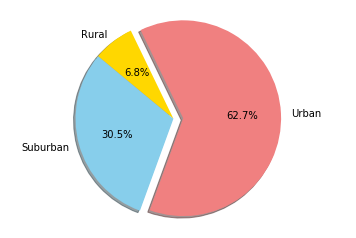

In [24]:
labels = 'Urban', 'Rural', 'Suburban'
sizes = [fares_urban, fares_rural, fares_suburban]
explode = (0.1, 0, 0) 

pie1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "skyblue"])
ax1.axis('equal') 


plt.show()